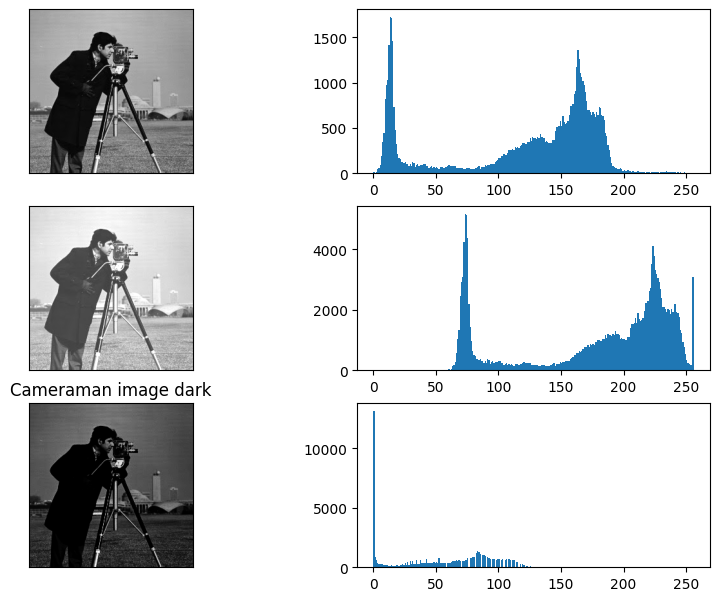

In [15]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from scipy import ndimage


cameramn_image = cv2.imread("cameraman.jpg", cv2.IMREAD_GRAYSCALE)

equ = cv2.equalizeHist(cameramn_image)

def decal_histogram(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def make_darker(image, quantity=1.0):

   table = np.array([((i / 255.0) ** quantity) * 255
      for i in np.arange(0, 256)]).astype("uint8")
    
   return cv2.LUT(image, table)

res_bright = decal_histogram(cv2.imread("cameraman.jpg"), 70)

res_dark = make_darker(cameramn_image,1.0/0.4)



plt.figure(figsize=(10, 10), dpi=100)

plt.subplot(4,2,1), plt.imshow(cameramn_image, cmap = 'gray'), plt.xticks([]), plt.yticks([])

plt.subplot(4,2,2), plt.hist(cameramn_image.ravel(), 256, [0, 256])

plt.subplot(4,2,3), plt.imshow(res_bright, cmap = 'gray'), plt.xticks([]), plt.yticks([])

plt.subplot(4,2,4), plt.hist(res_bright.ravel(), 256, [0, 256])

plt.subplot(4,2,5), plt.imshow(res_dark, cmap = 'gray'), plt.title('Cameraman image dark'), plt.xticks([]), plt.yticks([])

plt.subplot(4,2,6), plt.hist(res_dark.ravel(), 256, [0, 256])


plt.show()



/home/akram09/Projects/StudyProjects/2CSSIQTPs/IMN/TP3/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


<Figure size 432x288 with 0 Axes>

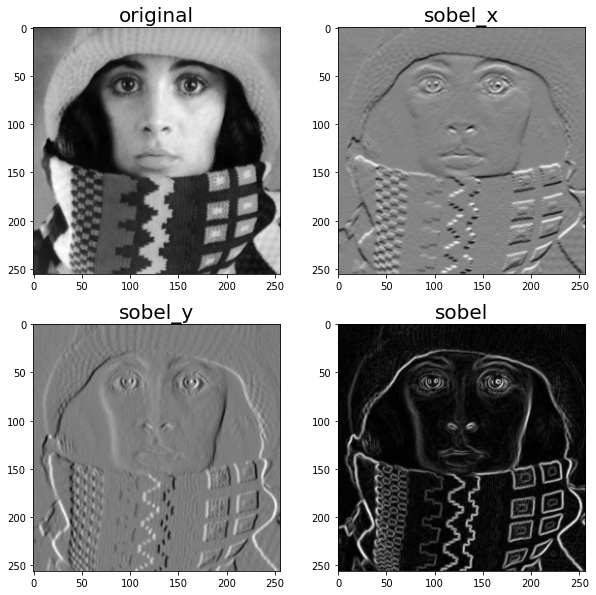

In [7]:
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
im = rgb2gray(imread('trui.png')) # RGB image to gray scale
plt.gray()
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.subplot(222)
edges_y = filters.sobel_h(im) 
plt.imshow(edges_y)
plt.title('sobel_x', size=20)
plt.subplot(223)
edges_x = filters.sobel_v(im)
plt.imshow(edges_x)
plt.title('sobel_y', size=20)
plt.subplot(224)
edges = filters.sobel(im)
plt.imshow(edges)
plt.title('sobel', size=20)
plt.show()